## SVM (Support Vector Machines)

Broadly speaking, algorithm consists of two steps:
1. Mapping data to high-dimensional space, so that data points can be categorized, even when the data are not otherwise linearly separable (e.g. plot below)
![](support_vestor_machines.png)
2. Finding a hyperplane-separator, that categorizes new examples
![](1-support_vestor_machines.png)

With following challenges:
1. How to map data in such a way, that separator could be found
2. How to find optimal separator

#### Data Mapping
On the first plot data is not linearly separable, but increasing dimensions, by adding derived variable, it becomes separable. This process called **kernelling**

![](2_support_vestor_machines.png)

## Finding Optimal Separator

One way to define optimal, is separator, that creates bigger margin between two groups
![](3_support_vestor_machines.png)
"Points", closest to separator are **support vectors**

So the goal is to find separator, with maximum distance to support vectors

## Pros and Cons
Advantages:
- Accurate for data, that naturally has high number of dimensions

Disadvantages:
- Does not provide probability
- Inefficient for large datasets

Applications:
- Image recognition
- Text mining (bc high dimentional data)
- Spam Detection, Sentiment analysis (bc high dim)
- Gene expression classification (bc high dim)

In [44]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix

import itertools

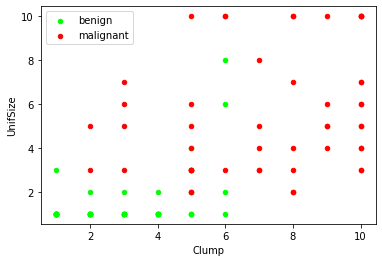

In [35]:
cell_df = pd.read_csv("cell_samples.csv")

ax = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Lime', label='benign')
cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='malignant', ax=ax)
plt.show()

In [24]:
# BareNuc col contains non numerical vales, so should be converted

# todo: what does it do?
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [34]:
X = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
y = cell_df[['Class']].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

## Modeling
The SVM algorithm offers a choice of kernel functions

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```


In [56]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
model = svm.SVC(kernel='rbf') # Support Vector Classification
model.fit(X_train, y_train)

/Users/klepovaleks/miniconda3/envs/ml-ibm/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: 'pm' is not in list

## Evaluation
Refer to notebook on knn for refreshment

In [52]:
yhat = model.predict(X_test)

print("f1_score      = {}".format(f1_score(y_test, yhat, average='weighted')))
print("jaccard_score = {}".format(jaccard_score(y_test, yhat,pos_label=2)))

confusion_matrix(y_test, yhat)

f1_score      = 0.9639038982104676
jaccard_score = 0.9444444444444444


array([[85,  5],
       [ 0, 47]])

## Practice
Comparison of accuracy for different kernel functions

In [64]:
def print_evaluation(X_test, y_test, kernel_func):
    yhat = model.predict(X_test)

    print("Scores for {}".format(kernel_func))
    print(confusion_matrix(y_test, yhat))
    print("f1_score      = {}".format(f1_score(y_test, yhat, average='weighted')))
    print("jaccard_score = {}".format(jaccard_score(y_test, yhat,pos_label=2)))
    print("\n")

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)

    print_evaluation(X_test, y_test, kernel)

Scores for linear
[[85  5]
 [ 0 47]]
f1_score      = 0.9639038982104676
jaccard_score = 0.9444444444444444


Scores for poly
[[86  4]
 [ 0 47]]
f1_score      = 0.9710669934861801
jaccard_score = 0.9555555555555556


Scores for rbf
[[85  5]
 [ 0 47]]
f1_score      = 0.9639038982104676
jaccard_score = 0.9444444444444444


Scores for sigmoid
[[54 36]
 [47  0]]
f1_score      = 0.3714602361753353
jaccard_score = 0.39416058394160586




/Users/klepovaleks/miniconda3/envs/ml-ibm/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klepovaleks/miniconda3/envs/ml-ibm/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klepovaleks/miniconda3/envs/ml-ibm/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/klepovaleks/miniconda3/envs/ml-ibm/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning